# Data 전처리(Data Preprocessing)란

-   데이터 분석이나 머신러닝 모델에 적합한 형태로 데이터셋을 변환 또는 조정하는 과정을 말한다.
-   데이터 분석, 머신러닝 모델링 전에 수행하는 작업이다.
-   Garbage in, Garbage out.
    -   좋은 dataset으로 학습 해야 좋은 예측 결과를 만드는 모델을 학습할 수 있다.
    -   좋은 train dataset을 만드는 것은 모델의 성능에 가장 큰 영향을 준다.
-   Data 전처리에는 다음과 같은 작업이 있다.
    -   **Data Cleaning (데이터 정제)**
        -   데이터셋에 있는 오류값, 불필요한 값, 결측치, 중복값 등을 제거하는 작업
    -   **컬럼 선택 및 파생변수 생성**
        -   컬럼들 중 분석에 필요한 컬럼들만 선택하거나 기존 컬럼들을 계산한 결과값을 가지는 파생변수를 생성한다.
    -   **Feature의 데이터 타입 별 변환**
        -   문자열을 날짜 타입으로 변환, 범주형을 수치형으로 변환등과 같이 원래 데이터의 형식에 맞게 변환하는 작업.
        -   **수치형 데이터 Feature Scaling**
            -   수치형 컬럼들의 scale(척도) 를 맞춰 주는 작업.
        -   **범주형 데이터 인코딩**
            -   문자열 형태로 되어있는 범주형 데이터를 숫자 형태로 변경하는 작업.


# 결측치(Missing Value) 처리

-   결측치(Missing Value)
    -   수집하지 못한 값. 모르는 값. 없는 값
    -   결측치 값은 `NA, NaN, None, null` 로 표현한다. (언어마다 차이가 있다.)
-   결측치는 데이터 분석이나 머신러닝 모델링 전의 데이터 전처리 과정에서 처리해줘야 한다.


### 결측치 처리 방법

결측치를 처리하기 전에 **"이 값이 기록되지 않아서 누락된 것인가, 아니면 존재하지 않아서 누락된 것인가?"** 를 확인해야 한다.  
존재하지 않아서 누락된 값이라면 이것은 어떤 값일까 추측할 필요 없이 결측치로 유지하면 되지만  
값이 기록되지 않아서(수집하지 못해서) 누락된 경우는 해당 열과 행의 다른 값을 기반으로 값이 무엇이었을지 추측해 볼 수 있다


- #### 결측치 삭제(Complete Case Analysis):

    -   리스트와이즈 삭제(Listwise Deletion)
        -   결측치가 있는 행들을 삭제한다.
        -   수집한 데이터도 같이 삭제되는 단점이 있다.
        -   데이터가 충분히 크고 결측치가 많지 않을 때 적합하다.
    -   컬럼 삭제 (Drop column)
        -   컬럼자체에 결측차가 너무 많을 경우 컬럼을 제거할 수도 있다.

In [1]:
import pandas as pd
import numpy as np
data = {
    "name":['김영희', '이명수', '박진우', '이수영', '오영미'],
    "age": [23, 18, 25, 32, np.nan], 
    "weight":[np.nan, 80, np.nan, 57, 48]
}
df = pd.DataFrame(data)
df

,name,age,weight
0,김영희,23.0,NaN
1,이명수,18.0,80.0
2,박진우,25.0,NaN
3,이수영,32.0,57.0
4,오영미,NaN,48.0


In [4]:
# 결측치 확인 - 전체
df.isna().sum() # 컬럼별 결측치 개수

name      0
age       1
weight    2
dtype: int64

In [10]:
## 결측치 값 확인
import numpy as np
print(pd.isna(None))
print(pd.isna(np.nan))
print(pd.isna(pd.NA))
# print(np.nan == None)
# print(np.nan == np.nan)

True
True
True


In [11]:
df

,name,age,weight
0,김영희,23.0,NaN
1,이명수,18.0,80.0
2,박진우,25.0,NaN
3,이수영,32.0,57.0
4,오영미,NaN,48.0


In [12]:
# 제거 - 행단위(리스트와즈, 0축 기준 제거: default)
df.dropna()

,name,age,weight
1,이명수,18.0,80.0
3,이수영,32.0,57.0


In [ ]:
# 컬럼단위 (1축 기준 삭제)
df.dropna(axis=1)

# drop(): 행/열을 지정해서 삭제
# dropna(): 결측치있는 행/열을 삭제
# drop_duplicates(): 중복 행을 삭제

,name
0,김영희
1,이명수
2,박진우
3,이수영
4,오영미


#### 2. 결측치 대체(imputation)

결측치가 수집하지 못해 누락된 경우 그 값일 가능성이 가장 높은 값으로 대체할 수 있다.  
대체할 값으로 일정한 값을 사용하는 경우와 분석을 통해 찾는 방법이 있다.

-   **평균/중앙값/최빈값 대체**
    -   수치형 변수의 경우 평균이나 중앙값으로, 범주형 변수의 경우 최빈값으로 결측치를 대체한다.
    -   **평균으로 대체** - 수치형 컬럼으로 outlier(극단치)의 영향을 받지 않는 모델이거나 컬럼의 데이터들이 **정규 분포를 따르거나 outlier(극단치)가 없는 경우** 적합.
    -   **중앙값으로 대체**
        -   수치형 컬럼으로 outlier(극단치)가 존재하거나 데이터 분포가 비대칭인 컬럼의 결측치 대체에 적합.
        -   보통 평균보다 중앙값을 사용한다.
    -   **최빈값으로 대체**
        -   범주형 컬럼의 경우 대푯값인 최빈값으로 대체한다.
    
-   **모델링 기반 대체**
    -   결측치가 있는 컬럼을 output(종속변수)으로 결측치가 없는 행들(독립변수)을 input으로 하여 결측치를 예측하는 모델을 정의한다.
    -   **K-최근접 이웃(K-NN) 대체**
        -   결측치가 있는 데이터 포인트와 가장 가까운 K개의 데이터 포인트를 찾아, 그 값들의 평균(수치형 데이터)이나 최빈값(범주형 데이터)으로 결측치를 대체한다.
-   **결측치를 표현하는 값으로 대체**
    -   예를 들어 나이컬럼의 nan을 -1, 혈액형의 nan을 "없음" 등과 같이 그 컬럼이 가질 수없는 값을 nan 대신 사용한다.
-   #### 다중 대체 (multiple imputation)
    -   여러 방식으로 결측치를 대체한 데이터셋을 만든다. 각 데이터셋마다 분석하고 추론한 뒤 그 결과들을 합쳐서 최종 결론을 낸다.


In [26]:
import pandas as pd
import numpy as np

df = pd.DataFrame([
        [0.1, 2.2, np.nan],
        [0.3, 4.1, 1], 
        [np.nan, 6, 1],
        [0.08, np.nan, 2],
        [0.12, 2.4, 1],
        [np.nan, 1.1, 3]
    ], columns=['A', 'B', 'C']
)
org = df.copy()

In [27]:
df

,A,B,C
0,0.10,2.2,NaN
1,0.30,4.1,1.0
2,NaN,6.0,1.0
3,0.08,NaN,2.0
4,0.12,2.4,1.0
5,NaN,1.1,3.0


In [28]:
# 컬럼별(속성) 처리.
### 평균 대체
df['A']  = df['A'].fillna(df['A'].mean())
df

,A,B,C
0,0.10,2.2,NaN
1,0.30,4.1,1.0
2,0.15,6.0,1.0
3,0.08,NaN,2.0
4,0.12,2.4,1.0
5,0.15,1.1,3.0


In [29]:
### 중앙값
df['B'] = df['B'].fillna(df['B'].median())
df

,A,B,C
0,0.10,2.2,NaN
1,0.30,4.1,1.0
2,0.15,6.0,1.0
3,0.08,2.4,2.0
4,0.12,2.4,1.0
5,0.15,1.1,3.0


In [30]:
df['C'].mode()[0]

np.float64(1.0)

In [33]:
### 최빈값(범주형)
df['C'] = df['C'].fillna(df['C'].mode())  # mode(): Series를 반환.
df

,A,B,C
0,0.10,2.2,1.0
1,0.30,4.1,1.0
2,0.15,6.0,1.0
3,0.08,2.4,2.0
4,0.12,2.4,1.0
5,0.15,1.1,3.0


## scikit-learn 전처리기 이용한 대체

### SimpleImputer

- **SimpleImputer**는 결측값을 대체하는 데 사용되는 전처리 클래스로  결측값을 평균, 중앙값, 최빈값 으로 대체한다.
- **메소드**
  - **initializer** 파라미터
    - **strategy**: 어떤 값으로 대체할지 지정. "median": 중앙값, "mean": 평균, "most_frequent": 최빈값, "constant": 상수(fill_value=채울값) 중 하나 사용.
  
  
### KNNImputer
- KNN(K-최근접 이웃(K-Nearest Neighbors) **머신러닝 알고리즘을 이용해 결측치를 추정해서 대체**한다.
- 결측값이 있는 샘플의 최근접 이웃을 찾아 그 이웃들의 값을 평균내어 결측값을 대체한다.

#### 공통 메소드(모든 전처리기의 공통)
- fit()
  - 변환할 때 필요한 값들을 찾아서 instance변수에 저장. (컬럼별 평균, 중앙값)
- transform()
  - fit에서 찾은 값을 이용해 결측치를 대체한다.
- fit_transform() : fit(), transform()을 순서대로 한번에 처리.

In [35]:
df['C'].to_frame()  # series -> DataFrame

,C
0,1.0
1,1.0
2,1.0
3,2.0
4,1.0
5,3.0


In [37]:
df = org.copy()
df

,A,B,C
0,0.10,2.2,NaN
1,0.30,4.1,1.0
2,NaN,6.0,1.0
3,0.08,NaN,2.0
4,0.12,2.4,1.0
5,NaN,1.1,3.0


In [41]:
########################################################
# SimpleImputer 예제
########################################################
df = org.copy()

from sklearn.impute import SimpleImputer

# A, B (수치형) => 중앙값, C(범주형) => 최빈값
imputer1 = SimpleImputer(strategy="median")
imputer2 = SimpleImputer(strategy="most_frequent")

# imputer.fit(2차원 데이터셋)
imputer1.fit(df[['A', 'B']])  # 결측치를 어떤 값으로 바꿀지 학습. (2차원 -> 0축 기준으로 계산)
result1 = imputer1.transform(df[['A', 'B']])  # 변환작업 (fit에서 찾은 중앙값으로 결측치를 대체)

result2 = imputer2.fit_transform(df['C'].to_frame()) #series.to_frame() : Series->DataFrame
# fit/transform 을 순서대로 실행. fit/transform을 같은 데이터셋으로 할 경우 사용.

# result1, result2 하나로 합치기.
## ndarray 합치는 함수: np.concatenate([대상 배열들], axis=합칠방향(default: 0))
result = np.concatenate([result1, result2], axis=1)
print(result.shape)
result

(6, 3)


array([[0.1 , 2.2 , 1.  ],
       [0.3 , 4.1 , 1.  ],
       [0.11, 6.  , 1.  ],
       [0.08, 2.4 , 2.  ],
       [0.12, 2.4 , 1.  ],
       [0.11, 1.1 , 3.  ]])

In [42]:
result1.shape, result2.shape

((6, 2), (6, 1))

In [44]:
########################################################
# KNNImputer 예제
########################################################
df = org.copy()
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=3)  # K - 가까운 데이터포인트 몇개를 확인 할지.
result = imputer.fit_transform(df)
# imputer.fit(df) -> imputer.transform(df)
print(result)

[[0.1        2.2        2.        ]
 [0.3        4.1        1.        ]
 [0.16666667 6.         1.        ]
 [0.08       2.9        2.        ]
 [0.12       2.4        1.        ]
 [0.1        1.1        3.        ]]


# 이상치(Outlier) 처리

-   데이터 집합에서 다른 관측치들과 크게 다른 값을 가지는 데이터 포인트를 말한다.
    -   잘못된 값이나 극단치가 있다.
-   이상치가 생기는 원인은 데이터 수집과정에서의 문제, 측정 오류, 극단적 변이가 반영된 값(엄청 튀는 값)이 수집된 경우 등이 있다.
-   이상치는 이상치들은 일반적인 경향에서 벗어난 값이므로 **정확하게 식별하고 처리하는 것이 분석의 정확성과 신뢰성을 높이는데 중요하다.**


## 분포에서 벗어난 이상치(Outlier) 식별

-   통계적 기준과 도메인 기준이 있다.

### 통계적 기준

-   **표준편차 기준**
    -   데이터가 **정규분포**를 따른다고 가정할 때 평균으로 부터 _k_ 표준편차 범위 밖으로 떨어진 데이터 포인트를 outlier 로 판단한다.

\begin{align}
&정상범위\,값: \mu - k \times \sigma \ \leq value \leq \mu + k \times \sigma \\
&\mu: 평균,\, \sigma: 표준편차
\end{align}

-   **분위수 기준**
    -   IQR(Inter quantile Range) 을 이용해 Outlier 여부를 찾는다.
    -   1분위, 3분위 에서 IQR \* 1.5 보다 더 떨어진 값을 outlier로 판단한다. 단 정상 범위를 조정하려고 할때는 1.5값을 변경할 수 있다.

\begin{align}
&IQR = 3분위 - 1분위 \\
&정상범위\,값:  (1분위 - 1.5\times IQR) \leq value \leq  (3분위 + 1.5\times IQR)
\end{align}

-   **극단치(분포에서 벗어난 값) 처리** 
    -   정상적이 값이지만 다른 값들과 다른 패턴을 가지는 값.
    -   일반적으로 극단적으로 크거나 작은 값
    -   처리
        1. 제거한다.
            - 결측치로 대체 하거나 데이터 포인트(행)를 제거한다.
            - outlier가 분석 결과에 부정적 영항을 미치는 경우.
            - outlier값이 대상 집단을 대표하지 않는다고 판단할 경우 .
            - 명확히 잘못수집 된 오류값일 경우
        1. 윈저화 (Winsorization)
            - 최소값과 최값을 정해 놓고 그 범위를 넘어서는 작은 값은 최소값으로 범위를 넘어서 큰 값은 최대값으로 대체한다.
        1. 대체 (Imputation)
            - 평균, 중앙값, 최빈값 등으로 대체한다.


In [1]:
import pandas as pd
import numpy as np
np.random.seed(0)

df = pd.DataFrame(np.random.normal(10, 2, size=(10, 3)), columns=['a', 'b', 'c'])
df.iloc[[0, 3], [0, 2]] = [[100, 200],[300,-100]]
df

,a,b,c
0,100.000000,10.800314,200.000000
1,14.481786,13.735116,8.045444
2,11.900177,9.697286,9.793562
3,300.000000,10.288087,-100.000000
4,11.522075,10.243350,10.887726
5,10.667349,12.988158,9.589683
6,10.626135,8.291809,4.894020
7,11.307237,11.728872,8.515670
8,14.539509,7.091269,10.091517
9,9.625632,13.065558,12.938718


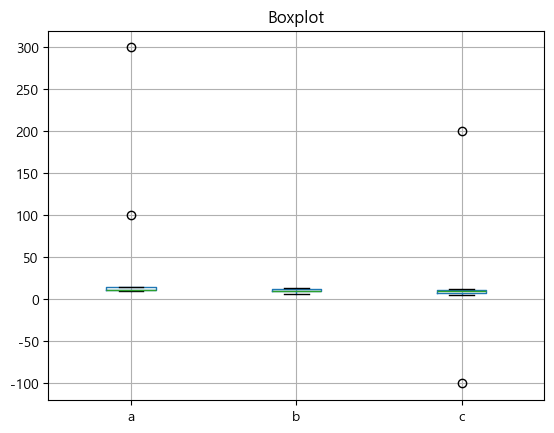

In [2]:
import matplotlib.pyplot as plt

# Boxplot을 이용해 이상치 확인
df.boxplot()
plt.title('Boxplot')
plt.show()

In [8]:
####################################################################
# # 4 분위수 기준으로 outlier를 찾기(식별)
# 1. "1분위(100분위기준 25분위), 3분위(100분위 기준 75분위)" 계산.
# 2. "IQR(Inter Quartile Range) = 3분위수 - 1분위수" 계산
# 3. "정상범위: v < 1분위값 - 1.5*iqr, v > 3분위 + 1.5*iqr" 조건으로 outlier를 찾기
####################################################################
# "a" 컬럼에서 outlier를 찾기
q1, q3 = df['a'].quantile(q=[0.25, 0.75]) # 1, 3분위값
iqr = q3 - q1
whis = 1.5
iqr = iqr * whis
# df['a'][~df['a'].between(q1 - iqr, q3 + iqr)]  #series boolean indexing
df.loc[~df['a'].between(q1 - iqr, q3 + iqr)]

,a,b,c
0,100.0,10.800314,200.0
3,300.0,10.288087,-100.0


In [9]:
# 함수화 하기.
def find_outliers(df, column_name, whis=1.5):
    """
    분위수 기준으로 이상치를 찾는 함수

    Args:
        df (pd.DataFrame): 데이터프레임
        column_name (str): 이상치를 찾을 컬럼명

    Returns:
        pd.Series: 이상치 값들
    """
    q1, q3 = df[column_name].quantile(q=[0.25, 0.75])
    iqr = q3 - q1
    iqr *= whis

    return df.loc[~df[column_name].between(q1 - iqr, q3 + iqr), column_name]

In [11]:
find_outliers(df, 'c')

0    200.0
3   -100.0
Name: c, dtype: float64

# Feature 타입 별 전처리

## Feature(변수)의 타입

-   **범주형(Categorical) 변수**
    -   범주를 구분하는 이름을 가지는 변수.
        -   **범주(範疇)** 의미: 동일한 성질을 가진 부류나 범위
        -   각 값 사이에 값이 없는 이산적 특징을 가진다.
        -   값이 될 수있는 값들이 정해져 있다.
    -   **명목(Norminal) 변수/비서열(Unordered) 변수**
        -   범주에 속한 값간에 서열(순위)가 없는 변수
        -   성별, 혈액형, 지역
    -   **순위(Ordinal) 변수/서열(Ordered) 변수**
        -   범주에 속한 값 간에 서열(순위)가 있는 변수
        -   성적, 직급, 만족도
-   **수치형(Numeric) 변수**
    -   수량을 표현하는 값들을 가지는 변수.
    -   **이산형(Discrete) 변수**
        -   수치를 표현하지만 소수점의 형태로 표현되지 못하는 데이터. 정수형 값들을 가진다.
        -   예) 하루 방문 고객수, 가격(원화), 물건의 개수
    -   **연속형(Continuous) 변수**
        -   수치를 표현하며 소수점으로 표현가능한 데이터. 실수형 값들을 가진다.
        -   예) 키, 몸무게, 시간


## 범주형 데이터 전처리

-   Scikit-learn의 머신러닝 API들은 Feature나 Label의 값들이 숫자(정수/실수)인 것만 처리할 수 있다.
-   문자열(str)일 경우 숫자 형으로 변환해야 한다.
    -   **범주형 변수의 경우** 전처리를 통해 정수값으로 변환한다.
    -   범주형이 아닌 **단순 문자열인** 경우 일반적으로 제거한다.


### 범주형 Feature의 처리

-   Label Encoding
-   One-Hot Encoding


### 레이블 인코딩(Label encoding)

-   범주형 Feature의 고유값들 오름차순 정렬 후 0 부터 1씩 증가하는 값으로 변환
-   **숫자의 크기의 차이가 모델에 영향을 주지 않는 트리 계열 모델(의사결정나무, 랜덤포레스트)에 적용한다.**
-   **숫자의 크기의 차이가 모델에 영향을 미치는 선형 계열 모델(로지스틱회귀, SVM, 신경망)에는 사용하면 안된다.**

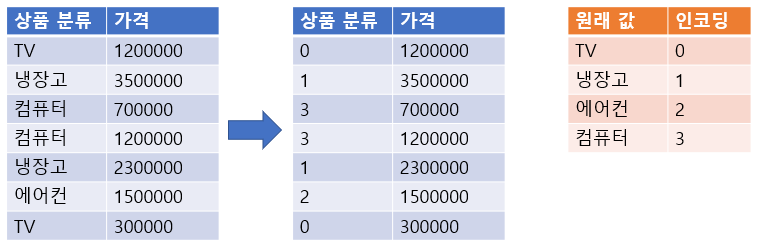


-   **sklearn.preprocessing.LabelEncoder** 사용
    -   fit(): 어떻게 변환할 지 학습
    -   transform(): 문자열를 숫자로 변환
    -   fit_transform(): 학습과 변환을 한번에 처리
    -   inverse_transform():숫자를 문자열로 변환
    -   classes\_ : 인코딩한 클래스 조회


In [12]:
import pandas as pd
# LabelEncoder는 1차원 자료구조(iterable)을 받아서 변환.
items = pd.Series(['TV', '냉장고', '컴퓨터', '컴퓨터', '냉장고', '에어콘',  'TV', '에어콘'])

In [ ]:
import numpy as np
from sklearn.preprocessing import LabelEncoder

# LabelEncoder의 instance 생성
le = LabelEncoder()

# 학습: 각 고유값들을 어떤 정수로 바꿀지 계산.
le.fit(['TV', '냉장고', '컴퓨터', '에어콘', '공기 청정기', '정수기'])  # 인코딩 대상을 넣어 학습한다.

# 변환: 학습 결과에 맞춰서 값들을 변환
result1 = le.transform(items)
print(result1)

[0 2 5 5 2 3 0 3]


In [14]:
# 어떤 값을 어떻게 바꿨는지 조회, 값: 고유값, index: encoding 한 값
print(le.classes_)
type(le.classes_)

['TV' '공기 청정기' '냉장고' '에어콘' '정수기' '컴퓨터']


numpy.ndarray

In [ ]:
le.classes_[result1] # fancy indexing ([0 2 5 5 2 3 0 3])

array(['TV', '냉장고', '컴퓨터', '컴퓨터', '냉장고', '에어콘', 'TV', '에어콘'], dtype='<U6')

In [16]:
le.inverse_transform(result1) # 0 -> TV

array(['TV', '냉장고', '컴퓨터', '컴퓨터', '냉장고', '에어콘', 'TV', '에어콘'], dtype='<U6')

In [ ]:
le.inverse_transform([3, 1, 4, 4, 4, 5, 1])

array(['에어콘', '공기 청정기', '정수기', '정수기', '정수기', '컴퓨터', '공기 청정기'], dtype='<U6')

In [18]:
# fit 대상과 transform 대상이 동일한 경우. -> fit_transform() 한번에 변환.
le2 = LabelEncoder()
result2 = le2.fit_transform(items)
print(le2.classes_)
result2

['TV' '냉장고' '에어콘' '컴퓨터']


array([0, 1, 3, 3, 1, 2, 0, 2])

In [20]:
le2.classes_

array(['TV', '냉장고', '에어콘', '컴퓨터'], dtype=object)

In [19]:
### encoding 값을 원래 값으로 원복시키기(Decoding)
le2.inverse_transform([1, 1, 1, 2, 2 ])

array(['냉장고', '냉장고', '냉장고', '에어콘', '에어콘'], dtype=object)

In [22]:
# le2.transform(['마우스', '컴퓨터']) #fit() 할 때 없는 것을 변환하면 KeyError발생.

### 원핫 인코딩(One-Hot encoding)

-   N개의 클래스를 N 차원의 One-Hot 벡터로 표현되도록 변환
    -   고유값들을 피처(컬럼)로 만들고 정답에 해당하는 열은 1로 나머진 0으로 표시한다..
-   **숫자의 크기 차이가 모델에 영향을 미치는 선형 계열 모델(로지스틱회귀, SVM, 신경망)에서 범주형 데이터 변환시 Label Encoding보다 One Hot Encoding을 사용한다.**
-   **DecisionTree 계열의 알고리즘은 Feature에 0이 많은 경우(Sparse Matrix라고 한다.) 성능이 떨어지기 때문에 Label Encoding을 한다.**

    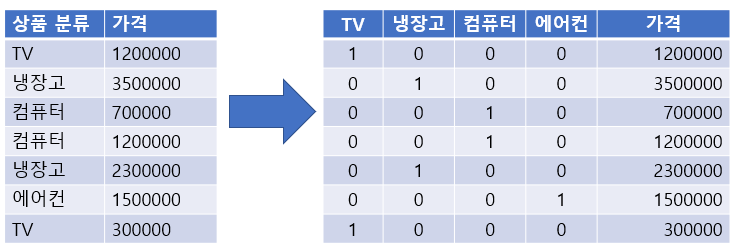


#### One-Hot Encoding 변환 처리

-   **sklearn.preprocessing.OneHotEncoder**
    -   **fit(데이터셋)**: 데이터셋을 기준으로 어떻게 변환할 지 학습
    -   **transform(데이터셋)**: Argument로 받은 데이터셋을 원핫인코딩 처리
    -   **fit_transform(데이터셋)**: 학습과 변환을 한번에 처리
    -   **get_feature_names_out()** : 원핫인코딩으로 변환된 Feature(컬럼)들의 이름을 반환
    -   **데이터셋은 2차원 배열을 전달 하며 Feature별로 원핫인코딩 처리한다.**
        -   DataFrame도 가능
        -   원핫인코딩 처리시 모든 타입의 값들을 다 변환한다. (연속형 값들도 변환) 그래서 변환려는 변수들만 모아서 처리해야 한다.


> OneHotEncoder객체 생성시 sparse 매개변수의 값을 False로 설정하지 않으면 scipy의 csr_matrix(희소행렬 객체)로 반환.  
> 희소행렬은 대부분 0으로 구성된 행렬과 계산이나 메모리 효율을 이용해 0이 아닌 값의 index만 관리한다.  
> csr_matrix.toarray()로 ndarray로 바꿀수 있다.


In [23]:
import numpy as np
# 원핫 인코딩은 열 단위로 처리하므로 2차원 형태의 자료구조를 입력한다.
items=np.array([['TV'],['냉장고'],['전자렌지'],['컴퓨터'],['선풍기'],['선풍기'],['믹서'],['믹서']])
print(np.shape(items)) # items.shape
items  

(8, 1)


array([['TV'],
       ['냉장고'],
       ['전자렌지'],
       ['컴퓨터'],
       ['선풍기'],
       ['선풍기'],
       ['믹서'],
       ['믹서']], dtype='<U4')

In [24]:
from sklearn.preprocessing import OneHotEncoder
# 객체 생성
ohe = OneHotEncoder()
# 학습 - 어떻게 바꿀지 학습.
ohe.fit(items)
# 변환
result = ohe.transform(items)
# ohe.fit_transform(items)

In [26]:
print(type(result))
result

<class 'scipy.sparse._csr.csr_matrix'>


<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 8 stored elements and shape (8, 6)>

In [27]:
print(result)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 8 stored elements and shape (8, 6)>
  Coords	Values
  (0, 0)	1.0
  (1, 1)	1.0
  (2, 4)	1.0
  (3, 5)	1.0
  (4, 3)	1.0
  (5, 3)	1.0
  (6, 2)	1.0
  (7, 2)	1.0


In [28]:
result.toarray() # ndarray로 변환.

array([[1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.]])

In [29]:
ohe.get_feature_names_out()
# one hot encoding된 각 열(컬럼)이 어떤 class(고유값)을 나타내는지 조회.

array(['x0_TV', 'x0_냉장고', 'x0_믹서', 'x0_선풍기', 'x0_전자렌지', 'x0_컴퓨터'],
      dtype=object)

In [ ]:
## 학습대상과 변환대상이 같은 경우 - fit_transform()
ohe2 = OneHotEncoder(sparse_output=False)  # ndarray로 결과를 반환.
result2  = ohe2.fit_transform(items)
result2

array([[1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.]])

### adult dataset - one-hot encoding 적용
#### 데이터셋 소개
-   Adult 데이터셋은 1994년 인구조사 데이터 베이스에서 추출한 미국 성인의 소득 데이터셋.
-   target 은 income 이며 수입이 $50,000 이하인지 초과인지 두개의 class를 가진다.
-   https://archive.ics.uci.edu/ml/datasets/adult

#### 처리
-   범주형 컬럼을 원핫인코딩 처리한다.
-   범주형 Feature중 **income은 출력 데이터이므로 Label Encoding 처리**를 한 뒤 y로 뺀다.

In [1]:
import pandas as pd
import numpy as np

In [3]:
cols = ['age', 'workclass','fnlwgt','education', 'education-num', 'marital-status', 'occupation','relationship', 'race', 'gender','capital-gain','capital-loss', 'hours-per-week','native-country', 'income']
category_columns = ['workclass','education','marital-status', 'occupation','relationship','race','gender','native-country']
number_columns = ['age','fnlwgt', 'education-num','capital-gain','capital-loss','hours-per-week']
target = "income"

##### 데이터 로딩


In [4]:
import pandas as pd

data = pd.read_csv(
    'data/adult.data', 
    header=None,      # 첫번째 라인부터 데이터일 경우.
    names=cols,       # header(컬럼명) 지정
    na_values='?',    # 결측치로 읽을 값 설정.
    skipinitialspace=True # 값 앞의 공백을 제거하고 읽는다. `, abc` -> ' abc', 'abc'
)
data.shape

(32561, 15)

In [5]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   gender          32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [8]:
data.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
gender               0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

In [9]:
### 결측치 있는 범주형 값들 조회
data['workclass'].value_counts()

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

In [10]:
data['occupation'].value_counts()

occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: count, dtype: int64

In [11]:
data['native-country'].value_counts()

native-country
United-States                 29170
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                           29
Greece       

#### 결측치 처리

In [13]:
# 최빈값으로 대체
from sklearn.impute import SimpleImputer
df = data.copy()

imputer = SimpleImputer(strategy="most_frequent")
df[['workclass', 'occupation', 'native-country']] = \
                        imputer.fit_transform(df[['workclass', 'occupation', 'native-country']])

df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
gender            0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

#### encoding 처리
- Target(income) - Label Encoding
- Feature 중 범주형 - OneHot Encoding

In [16]:
df['income'].value_counts().sort_index()

income
<=50K    24720
>50K      7841
Name: count, dtype: int64

In [18]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

le = LabelEncoder()
y = le.fit_transform(df['income'])
np.unique(y, return_counts=True)

(array([0, 1]), array([24720,  7841]))

In [19]:
# 범주형 feature들 One hot encoding
ohe = OneHotEncoder(sparse_output=False)
cate_features = ohe.fit_transform(df[category_columns])
cate_features.shape

(32561, 99)

In [22]:
# ohe.get_feature_names_out()

In [27]:
df[number_columns].values

array([[    39,  77516,     13,   2174,      0,     40],
       [    50,  83311,     13,      0,      0,     13],
       [    38, 215646,      9,      0,      0,     40],
       ...,
       [    58, 151910,      9,      0,      0,     40],
       [    22, 201490,      9,      0,      0,     20],
       [    52, 287927,      9,  15024,      0,     40]], shape=(32561, 6))

In [28]:
# one hot encoding한 범주형 feature들과 수치형 feature들을 합치기.
X = np.concatenate(
    [cate_features, df[number_columns].values],
    axis=1
)
X.shape, y.shape

((32561, 105), (32561,))

#### 모델링

##### train / validation / test set 분리

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from metrics import print_binary_classification_metrics

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.25, stratify=y_train, random_state=0
)
X_train.shape, X_val.shape, X_test.shape

((19536, 105), (6512, 105), (6513, 105))

#####  모델링
- 모델 생성 - DecisionTreeClassifier
- 학습
- 검증

In [32]:
max_depth_list = [3, 4, 5, 6, 7, 8, 9, 10]

result_train = list() # []
result_val = list()
for max_depth in max_depth_list:
    # 1. 모델 생성
    model = DecisionTreeClassifier(max_depth=max_depth, random_state=0)
    # 2. trainset으로 학습
    model.fit(X_train, y_train)
    # 3. 검증
    ## 추론
    pred_train = model.predict(X_train)
    pred_val = model.predict(X_val)
    ## 검증
    result_train.append(accuracy_score(y_train, pred_train))
    result_val.append(accuracy_score(y_val, pred_val))

In [ ]:
result_df = pd.DataFrame({
    "train acc": result_train,
    "valid acc": result_val
})
result_df.index = range(3, len(result_train)+3) # max_depth_list
result_df.rename_axis(mapper="Max Depth", axis=0, inplace=True)
result_df

,train acc,valid acc
Max Depth,,
3,0.846284,0.841677
4,0.847052,0.842138
5,0.855600,0.848280
6,0.859388,0.851044
7,0.862664,0.851812
8,0.866503,0.854115
9,0.870700,0.854269
10,0.875512,0.854115


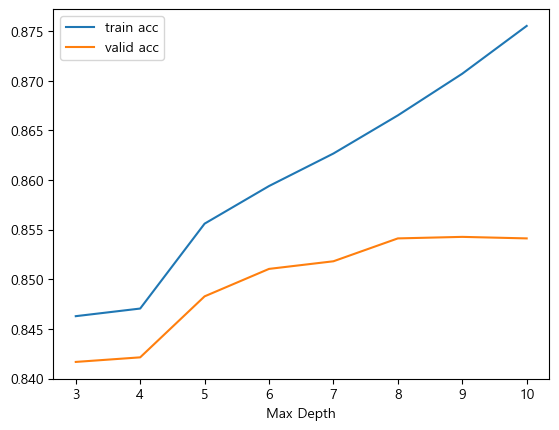

In [46]:
result_df.plot();

##### 최종평가

In [43]:
best_model = DecisionTreeClassifier(max_depth=9, random_state=0)
best_model.fit(X_train, y_train)
accuracy_score(y_test, best_model.predict(X_test))

0.8529095654844158

In [49]:
print_binary_classification_metrics(y_test, best_model.predict(X_test))

정확도: 0.8529095654844158
재현율: 0.5803571428571429
정밀도: 0.7520661157024794
F1 점수: 0.6551475881929446


In [52]:
np.unique(y_train, return_counts=True)[1]/y_train.size

array([0.75916257, 0.24083743])

# 수치형 데이터 전처리

-   연속형 데이터는 변수가 가지는 값들이 연속된 값인 경우로 보통 정해진 범위 안의 모든 실수가 값이 될 수 있다.

## Feature Scaling(정규화)

-   각 피처들간의 값의 범위(척도-Scale)가 다를 경우 이 값의 범위를 일정한 범위로 맞추는 작업
-   트리계열을 제외한 대부분의 머신러닝 알고리즘들이 Feature간의 서로 다른 척도(Scale)에 영향을 받는다.
    -   선형모델, SVM 모델, 신경망 모델
-   **Scaling(정규화)은 train set으로 fitting 한다. test set이나 예측할 새로운 데이터는 train set으로 fitting한 것으로 변환한다.**
    -   Train Set으로 학습한 scaler를 이용해 Train/Validation/Test set들을 변환한다.


### 종류

-   표준화(Standardization) Scaling
    -   StandardScaler 사용
-   Min Max Scaling
    -   MinMaxScaler 사용


### 메소드

-   fit(): 어떻게 변환할 지 학습
    -   2차원 배열을 받으면 0축을 기준으로 학습한다. (DataFrame으로는 컬럼기준)
-   transform(): 변환
    -   2차원 배열을 받으며 0축을 기준으로 변환한다. (DataFrame으로는 컬럼기준)
-   fit_transform(): 학습과 변환을 한번에 처리
-   inverse_transform(): 변환된 값을 원래값으로 복원


## 표준화(StandardScaler)

-   피쳐의 값들이 평균이 0이고 표준편차가 1인 범위에 있도록 변환한다.
    -   0을 기준으로 모든 데이터들이 모여있게 된다

\begin{align}
&New\,x_i = \cfrac{X_i-\mu}{\sigma}\\
&\mu-평균,\; \sigma-표준편차
\end{align}

-   **sklearn.preprocessing.StandardScaler** 를 이용


In [31]:
import numpy as np
data = np.array([[10], [2], [30]])  # ndarray 생성.
print(data.shape)
data

(3, 1)


array([[10],
       [ 2],
       [30]])

In [ ]:
# 평균, 표준편차 계산 ---> fit()
m = data.mean() # 평균
s = data.std()  # 표준편차
print(m, s, sep=" --- ")

14.0 --- 11.775681155103795


In [ ]:
# Standard Scaling -> transform()
result = (data - m)/s
result

array([[-0.33968311],
       [-1.01904933],
       [ 1.35873244]])

In [ ]:
print(result.mean(), result.std())

In [35]:
from sklearn.preprocessing import StandardScaler
# 객체 생성
s_scaler = StandardScaler()
# 어떻게 변환할지 학습 
s_scaler.fit(data)
# 변환
result2 = s_scaler.transform(data)
result3 = s_scaler.fit_transform(data) # 학습/변환 대상이 같은 경우.
result2

array([[-0.33968311],
       [-1.01904933],
       [ 1.35873244]])

In [36]:
result3

array([[-0.33968311],
       [-1.01904933],
       [ 1.35873244]])

In [37]:
result3.mean(), result3.std()

(np.float64(0.0), np.float64(1.0))

## MinMaxScaler

-   데이터셋의 모든 값을 0(Min value)과 1(Max value) 사이의 값으로 변환한다.
    $$
    New\,x_i = \cfrac{x_i - min(X)}{max(X) - min(X)}
    $$


##### 예제


In [38]:
data = np.array([[10], [2], [30]])
data

array([[10],
       [ 2],
       [30]])

In [ ]:
# fit()
minimum = data.min() #axis=0)
maximum = data.max()
print(minimum, maximum)

2 30


In [ ]:
# 변환 - tranform()
result = (data - minimum) / (maximum - minimum)
result

array([[0.28571429],
       [0.        ],
       [1.        ]])

In [42]:
from sklearn.preprocessing import MinMaxScaler

# 객체 생성
mm_scaler = MinMaxScaler()
# 학습
mm_scaler.fit(data)
# 변환
result2 = mm_scaler.transform(data)
result3 = mm_scaler.fit_transform(data)  # 학습/변환 대상이 같은 경우.
result2

array([[0.28571429],
       [0.        ],
       [1.        ]])

In [43]:
result3

array([[0.28571429],
       [0.        ],
       [1.        ]])

In [44]:
mm_scaler.inverse_transform(result2)

array([[10.],
       [ 2.],
       [30.]])

## 위스콘신 유방암 데이터셋으로 Scaling

-   위스콘신 대학교에서 제공한 유방암 진단결과 데이터
    -   https://archive.ics.uci.edu/dataset/15/breast+cancer+wisconsin+original
-   Feature: 종양 측정값들
    -   모든 Feature들은 **연속형(continous)** 이다.
-   target: 악성, 양성 여부
-   scikit-learn 패키지에서 toy dataset으로 제공한다.
    -   load_breast_cancer() 함수 이용


### 데이터 로딩 및 전처리

In [ ]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
feature = data['data']    # 속성 - 종양 검사 기록
target = data['target']   # 타겟 - 악성/양성 종양 여부.

feature.shape, target.shape

((569, 30), (569,))

In [ ]:
data['feature_names']
data['target_names'] # 0: 악성, 1: 양성

array(['malignant', 'benign'], dtype='<U9')

In [ ]:
feature[:3]

array([[1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
        3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
        8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
        3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
        1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, 1.326e+03, 8.474e-02, 7.864e-02,
        8.690e-02, 7.017e-02, 1.812e-01, 5.667e-02, 5.435e-01, 7.339e-01,
        3.398e+00, 7.408e+01, 5.225e-03, 1.308e-02, 1.860e-02, 1.340e-02,
        1.389e-02, 3.532e-03, 2.499e+01, 2.341e+01, 1.588e+02, 1.956e+03,
        1.238e-01, 1.866e-01, 2.416e-01, 1.860e-01, 2.750e-01, 8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, 1.203e+03, 1.096e-01, 1.599e-01,
        1.974e-01, 1.279e-01, 2.069e-01, 5.999e-02, 7.456e-01, 7.869e-01,
        4.585e+00, 9.403e+01, 6.150e-03, 4.006e-02, 3.832e-02, 2.058e-02,
        2.250e-02, 4.571e-03, 2.357e

### Feature Scaling

In [ ]:
##### Standard Scaling Dataset 
# scaling 전에 평균, 표준편차 확인
m = feature.mean(axis=0)
s = feature.std(axis=0)

array([3.52095076e+00, 4.29725464e+00, 2.42776193e+01, 3.51604754e+02,
       1.40517641e-02, 5.27663291e-02, 7.96497253e-02, 3.87687325e-02,
       2.73901809e-02, 7.05415588e-03, 2.77068942e-01, 5.51163427e-01,
       2.02007710e+00, 4.54510134e+01, 2.99987837e-03, 1.78924359e-02,
       3.01595231e-02, 6.16486075e-03, 8.25910439e-03, 2.64374475e-03,
       4.82899258e+00, 6.14085432e+00, 3.35730016e+01, 5.68856459e+02,
       2.28123569e-02, 1.57198171e-01, 2.08440875e-01, 6.56745545e-02,
       6.18130785e-02, 1.80453893e-02])

In [57]:
# standard scaling (모든 feature(컬럼)의 scale을 평균 0, 표준편차 1에 맞춘다.)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
result = scaler.fit_transform(feature)
result.shape

(569, 30)

In [58]:
print(result.mean(axis=0))
print(result.std(axis=0))

[-3.16286735e-15 -6.53060890e-15 -7.07889127e-16 -8.79983452e-16
  6.13217737e-15 -1.12036918e-15 -4.42138027e-16  9.73249991e-16
 -1.97167024e-15 -1.45363120e-15 -9.07641468e-16 -8.85349205e-16
  1.77367396e-15 -8.29155139e-16 -7.54180940e-16 -3.92187747e-16
  7.91789988e-16 -2.73946068e-16 -3.10823423e-16 -3.36676596e-16
 -2.33322442e-15  1.76367415e-15 -1.19802625e-15  5.04966114e-16
 -5.21317026e-15 -2.17478837e-15  6.85645643e-16 -1.41265636e-16
 -2.28956670e-15  2.57517109e-15]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [ ]:
#### Min Max Scaling
## scaling 전 feature별 min/max
print("MIN")
print(feature.min(axis=0))
print("MAX")
print(feature.max(axis=0))

MIN
[6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 4.996e-02 1.115e-01 3.602e-01 7.570e-01 6.802e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 7.882e-03 8.948e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.565e-01 5.504e-02]
MAX
[2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 3.454e-01 4.268e-01
 2.012e-01 3.040e-01 9.744e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 7.895e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 1.058e+00 1.252e+00 2.910e-01
 6.638e-01 2.075e-01]


In [61]:
from sklearn.preprocessing import MinMaxScaler
m_scaler = MinMaxScaler()
result_m = m_scaler.fit_transform(feature)

In [62]:
print("MIN")
print(result_m.min(axis=0))
print("MAX")
print(result_m.max(axis=0))

MIN
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
MAX
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


### 모델 학습

In [ ]:
from sklearn.model_selection import train_test_split
# dataset을 train/test set으로 분리
X_train, X_test, y_train, y_test = train_test_split(
    feature,
    target,
    test_size=0.25,
    stratify=target,
    random_state=42
)
X_train.shape, X_test.shape


((426, 30), (143, 30))

In [66]:
# scaling(standard/min max scaling)
# fit(): X_train
# transform(): X_train, X_test, X_validation
s_scaler = StandardScaler()
X_train_scaled_s = s_scaler.fit_transform(X_train) # s_scaler를 X_train을 기반으로 학습
X_test_scaled_s = s_scaler.transform(X_test)

# print(X_train_scaled_s.mean(axis=0))
# print(X_train_scaled_s.std(axis=0))

# print(X_test_scaled_s.mean(axis=0))
# print(X_test_scaled_s.std(axis=0))

In [70]:
m_scaler = MinMaxScaler()
X_train_scaled_m = m_scaler.fit_transform(X_train)
X_test_scaled_m = m_scaler.transform(X_test)

# print(X_train_scaled_m.min(axis=0))
# print(X_train_scaled_m.max(axis=0))

# print(X_test_scaled_m.min(axis=0))
# print(X_test_scaled_m.max(axis=0))

In [71]:
# 모델 학습
from sklearn.svm import SVC # SVM (분류: SVC, 회귀: SVR)
from sklearn.metrics import accuracy_score

In [77]:
######## scaling 안한 데이터로 모델링(모델 학습, 검증)
# svc1 = SVC(C=0.1, gamma=0.1, random_state=0)
svc1 = SVC(random_state=0)
# 학습
svc1.fit(X_train, y_train)
print("trainset acc:", accuracy_score(y_train, svc1.predict(X_train)))
print("testset acc:", accuracy_score(y_test, svc1.predict(X_test)))

trainset acc: 0.9178403755868545
testset acc: 0.9230769230769231


In [78]:
##### Standard Scaling 한 데이터로 모델링
# svc2 = SVC(C=0.1, gamma=0.1, random_state=0)
svc2 = SVC(random_state=0)
svc2.fit(X_train_scaled_s, y_train)

print("trainset acc:", accuracy_score(y_train, svc2.predict(X_train_scaled_s)))
print("testset acc:", accuracy_score(y_test, svc2.predict(X_test_scaled_s)))

trainset acc: 0.9788732394366197
testset acc: 0.9790209790209791


In [79]:
### Min Max Scaling 한 데이터로 모델링
# svc3 = SVC(C=0.1, gamma=0.1, random_state=0)
svc3 = SVC(random_state=0)
svc3.fit(X_train_scaled_m, y_train)

print("trainset acc:", accuracy_score(y_train, svc3.predict(X_train_scaled_m)))
print("testset acc:", accuracy_score(y_test, svc3.predict(X_test_scaled_m)))

trainset acc: 0.9788732394366197
testset acc: 0.9790209790209791


# 모델 저장 -> pickle

- 전처리 객체, 모델 객체 모두 저장한다.

In [ ]:
import os
os.path.join("python", "source", "test.py")

'python\\source\\test.py'

In [82]:
import os
# 저장할 경로 생성
save_dir = "saved_model/wisconsin_breast_cancer"
os.makedirs(save_dir, exist_ok=True)

scaler_path = os.path.join(save_dir, 'standard_scaler.pkl')
model_path = os.path.join(save_dir, 'svm_model.pkl')
print(scaler_path, model_path, sep="\n")

saved_model/wisconsin_breast_cancer\standard_scaler.pkl
saved_model/wisconsin_breast_cancer\svm_model.pkl


In [84]:
### Scaler 저장
import pickle

with open(scaler_path, 'wb') as fw_scaler:
    pickle.dump(scaler, fw_scaler)  # StandardScaler 학습

In [85]:
### 모델 저장
with open(model_path, 'wb') as fw_model:
    pickle.dump(svc2, fw_model)

In [87]:
# Scaler 모델 불러오기
with open(scaler_path, 'rb') as fr_scaler:
    saved_scaler = pickle.load(fr_scaler)
    
with open(model_path, 'rb') as fr_model:
    saved_svc = pickle.load(fr_model)

In [90]:
x_test_scaled = saved_scaler.transform(X_test)
result = saved_svc.predict(x_test_scaled)
accuracy_score(y_test, result)

0.9790209790209791